<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Matrice-de-covariance" data-toc-modified-id="Matrice-de-covariance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matrice de covariance</a></span></li><li><span><a href="#Calcul-des-composantes" data-toc-modified-id="Calcul-des-composantes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calcul des composantes</a></span></li><li><span><a href="#Dataset-Iris" data-toc-modified-id="Dataset-Iris-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset <em>Iris</em></a></span></li><li><span><a href="#Dataset-MNIST" data-toc-modified-id="Dataset-MNIST-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset MNIST</a></span></li><li><span><a href="#Complément:-partitionnement-des-données" data-toc-modified-id="Complément:-partitionnement-des-données-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Complément: partitionnement des données</a></span></li></ul></div>

# TP n°5 &nbsp;-&nbsp; analyse en composantes principales

<br>

L'analyse en composante principales est une méthode d'apprentissage non supervisé dont l'objectif est généralement de réduire la dimension des données. Au cours de cette séance nous allons revenir sur les principes de cette méthode puis nous verrons comment elle peut être appliquée sur différents jeux de données.

<br>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matrice de covariance

<br>

On considère un ensemble de $N$ données $\mathcal{D} = \{x^{(i)}\}_{1 \le i \le N}$ avec $x^{(i)} \in \mathbb{R}^d$. Les directions des composantes principales sont les vecteurs propres de la matrice de covariance associée à cet ensemble de données. Dans cette première partie vous allez calculer la matrice de covariance pour différents ensembles de données 2D artificielles.

<br>

**Exercice**

- Créez un ensemble de $N$ = 10$^6$ points en dimension 2 tels que les 2 composantes de chaque point sont tirées aléatoirement entre 0 et 1. Les données seront mises sous la forme d'une matrice $X$ de dimension $N \times 2$.
- Calculez la matrice de covariance $S = \frac{1}{N}\,X^TX$.
- La valeur des différents coefficients est-elle conforme à ce que l'on attend ? Si ce n'est pas le cas, quel est le problème ?
Les données ne sont pas centrées !!
- Corrigez le problème afin de calculer correctement la matrice $S$.
- Comparez avec le résultat renvoyés par les fonctions <code>numpy.cov(X)</code>.

<br>


In [3]:
import numpy as np

N = 10**6  # Nombre de points
X = np.random.rand(N, 2)
X_centre = X-np.mean(X)

# Calcul de la matrice de covariance S
S = (1/N) * np.dot(X_centre.T, X_centre)

# Vérification des valeurs de la matrice de covariance
print("Matrice de covariance S :")
print(S)

# Comparaison avec numpy.cov(X)
S_np = np.cov(X, rowvar=False)
print("Matrice de covariance calculée par numpy.cov(X) :")
print(S_np)

Matrice de covariance S :
[[8.31850430e-02 3.74023560e-05]
 [3.74023560e-05 8.33145882e-02]]
Matrice de covariance calculée par numpy.cov(X) :
[[8.31851158e-02 3.74127429e-05]
 [3.74127429e-05 8.33146611e-02]]


<br>

**Exercice**

Pour étudier les corrélations entre différentes variables, on s'appuie le plus souvent sur la **matrice de corrélation**. Le coefficient de corrélation de 2 variables $x$ et $y$ est défini par
$$ \rho(x,y) \;=\; \frac{\text{cov}(x,y)}{\sigma_x\sigma_y} $$
Pour calculer simplement la matrice de corrélation, on peut modifier la matrice des données $X$ afin que chaque variable ait une variance égale à 1.

- Calculer la matrice de corrélation associées aux données précédemment créées.
- Comparer avec le résultat renvoyé par la fonction <code>numpy.corrcoef()</code>.

<br>


In [4]:
# Calculate the standard deviation of each component
std_dev_x = np.std(X_centre[:, 0])
std_dev_y = np.std(X_centre[:, 1])

# Divide each component of X by its standard deviation to make the variance 1
X_normalized = np.column_stack([X_centre[:, 0] / std_dev_x, X_centre[:, 1] / std_dev_y])

# Calcul de la matrice de covariance S
S = (1/N) * np.dot(X_normalized.T, X_normalized)

# Vérification des valeurs de la matrice de covariance
print("Matrice de correlation S :")
print(S)

# Comparaison avec numpy.cov(X)
S_np = np.corrcoef(X, rowvar=False)
print("Matrice de correlation calculée par numpy.cov(X) :")
print(S_np)

Matrice de correlation S :
[[1.00000012e+00 4.49278737e-04]
 [4.49278737e-04 1.00000012e+00]]
Matrice de correlation calculée par numpy.cov(X) :
[[1.00000000e+00 4.49403055e-04]
 [4.49403055e-04 1.00000000e+00]]


<br>

**Exercice**

Refaire l'exercice précédent dans le cas de données où les 2 composantes sont linéairement reliées.

<br>

In [5]:
# fonction génératrice des données
def create_data(a, b, sigma, N):
    x = np.random.rand(N)
    epsilon = np.random.normal(0,sigma, size=N)
    y = a*x + b + epsilon

    X = np.column_stack((x, y))
    return X

X = create_data(1,3,0.01,1000000)

X_centre = X - np.mean(X, axis=0)

# Divide each component of X by its standard deviation to make the variance 1
X_normalized = X_centre / np.std(X_centre, axis=0)

# Calcul de la matrice de covariance S
S = (1/N) * np.dot(X_normalized.T, X_normalized)

# Vérification des valeurs de la matrice de covariance
print("Matrice de correlation S :")
print(S)

# Comparaison avec numpy.cov(X)
S_np = np.corrcoef(X, rowvar=False)
print("Matrice de correlation calculée par numpy.cov(X) :")
print(S_np)

Matrice de correlation S :
[[1.         0.99940138]
 [0.99940138 1.        ]]
Matrice de correlation calculée par numpy.cov(X) :
[[1.         0.99940138]
 [0.99940138 1.        ]]


<br>

## Calcul des composantes

<br>

Les directions des composantes principales peuvent être obtenues soit en diagonalisant la matrice de covariance, soit en effectuant une décomposition en valeurs singulières de la matrice des données $X$.

<br>

**Exercice**

- Construire la matrice $X$ pour un ensemble de $N$=10000 données 2D telles que la seconde composante est de la forme
$$ x_2^{(i)} \;=\; \alpha\,x_1^{(i)} \;+\; \varepsilon^{(i)} $$
où $\varepsilon$ est une variable aléatoire gaussienne de moyenne nulle est de variance $\ll$ 1. On centrera les données et on les normalisera de façon à ce que les 2 composantes aient une variance unitaire.
- Calculez la matrice de covariance (ici identique à la matrice de corrélation).
- Représentez une centaine de points de ces données sur un graphe dans le plan $(x_1,x_2)$.

<br>

[[1.         0.99985103]
 [0.99985103 1.        ]]
Matrice de correlation calculée par numpy.cov(X) :
[[1.         0.99985103]
 [0.99985103 1.        ]]


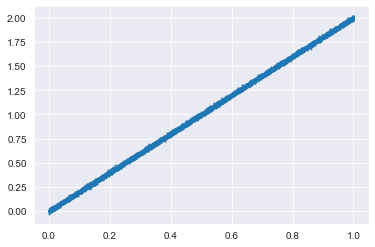

In [57]:
N = 10000  # Nombre de points

def create_data2(alpha, epsilon, N):
    x = np.random.rand(N)
    epsilon = np.random.normal(0,epsilon, size=N)
    y = alpha*x + epsilon
    X = np.column_stack((x, y))
    return X

X = create_data2(2, 0.01, N)

X_normalized = (X- np.mean(X, axis=0)) / np.std(X, axis=0)

S = (1/N) * np.dot(X_normalized.T, X_normalized)

print(S)

# Calcul de la matrice de covariance S
print("Matrice de correlation calculée par numpy.cov(X) :")
S_np = np.corrcoef(X, rowvar=False)
print(S_np)

# Représentation des données
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

<br>

**Exercice**

- A l'aide de la fonction <code>numpy.linalg.eigh()</code>, calculez les valeurs propres et les vecteurs propres de la matrice de covariance.
- A l'aide de la fonction <code>numpy.linalg.svd()</code>, calculez les valeurs singulières de $X$ ainsi que les directions des composantes principales.
- Quelle relation a t-on entre les valeurs propres et les valeurs singulières ? Cette relation est-elle bien vérifiée ?
- Vérifiez que les vecteurs propres de la matrice de covariance forment bien une base orthonormée.
- Représentez sur un graphe une centaine de points des données ainsi que les directions correspondant aux composantes principales.

<br>

Valeurs propres :
[1.48965069e-04 1.99985103e+00]
Valeurs singulières :
[1.99985103e+00 1.48965069e-04]
Vérification que les vecteurs propres forment une base orthonormée :
0.0
V : 
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
Vérification que les vecteurs propres sont bien les vecteurs singuliers de X :
0.0


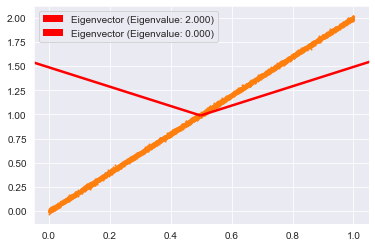

0.9999999999999988


In [69]:
# calcul valeur propres et vecteurs propres de la matrice de covariance
eigvals, eigvecs = np.linalg.eigh(S)

# calcul valeurs singulières et vecteurs singuliers de X
U, s, Vt = np.linalg.svd(X_normalized)

# vérification de la relation entre valeurs propres et valeurs singulières
print("Valeurs propres :")
print(eigvals)
print("Valeurs singulières :")
print(s**2/(N))

# vérification que les vecteurs propres forment une base orthonormée
print("Vérification que les vecteurs propres forment une base orthonormée :")
print(np.dot(eigvecs[:, 0], eigvecs[:, 1]))

# Récupération des vecteurs colonnes de V (matrice de la décomposition en valeurs singulières)
V = Vt.T
print("V : ")
print(V)

print("Vérification que les vecteurs propres sont bien les vecteurs singuliers de X :")
print(np.dot(V[:, 0], V[:, 1]))

# Représentation des données et des directions correspondant aux composantes principales
plt.scatter(X[:100, 0], X[:100, 1], s=1)
# Tracé des vecteurs propres (composantes principales) sous forme de lignes pointillées

# Calculate eigenvalues and eigenvectors of the covariance matrix
eigvals, eigvecs = np.linalg.eig(S)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=1)

# Plot the principal components as vectors
for eigenvalue, eigenvector in zip(eigvals, eigvecs.T):
    x, y = eigenvector
    plt.quiver(
        np.mean(X[:, 0]), np.mean(X[:, 1]),  # Starting point at the mean
        x, y,  # Eigenvector
        angles='xy', scale_units='xy', scale=1, color='r', label=f'Eigenvector (Eigenvalue: {eigenvalue:.3f})')

plt.legend()
plt.show()

<br>

**Exercice**

- Projetez les données sur les directions des composantes principales $\rightarrow$ matrice $Z$.
- Faire une copie de $Z$ sur laquelle vous annulerez les coefficients correspondant à la seconde composante $\rightarrow$ matrice $Z_{modif}$.
- Exprimez la matrice $Z_{modif}$ dans la base initiale $\rightarrow$ matrice $X_{modif}$.
- Représentez sur 4 graphes les données $X$, $Z$, $Z_{modif}$ et $X_{modif}$.

<br>

**Exercice** 

La méthode d'analyse en composantes principales est implémentée dans la bibliothèque scikit-learn (<code>sklearn.decomposition.PCA()</code>). 

- A quoi correspond l'argument n_components qui peut être fourni lors de l'appel de cette fonction ?
- Vérifiez que les composantes principales renvoyées par cette fonction correspondent bien à celles que vous avez calculées précédemment.
- Utilisez les méthodes <code>.transform()</code> et <code>.inverse_transform()</code> pour réaliser le même traitement des données que celui effectué précédemment.

<br>

<br>

## Dataset *Iris*

<br>

Nous allons maintenant utiliser l'analyse en composantes principales sur le dataset *Iris*. La dimension des données étant relativement petite ($d=4$), on va pouvoir visualiser facilement les principales propriétés statistiques des ces données en utilisant la fonction <code>pairplot()</code> de la librairie *seaborn*. Pour pouvoir utiliser cette fonction, les données doivent être importées sous la forme d'un dataframe *pandas*. On va donc tout d'abord charger ces deux librairies avant d'importer les données du dataset.

<br>

In [7]:
import pandas as pd
import seaborn as sns

<br>

**Exercice**

- Importer les données du dataset *Iris* sous la forme de 2 matrices X et y au format dataframe de la librairie pandas (voir documentation sur scikit-learn).
- La librairie pandas offre une large gamme d'outils pour la manipulation et l'analyse de données. A titre d'exemple vous pouvez appliquer la méthode <code>.describe()</code> sur ces deux variables afin d'afficher leurs propriétés statistiques. Quelles sont les informations renvoyées ?

<br>


<br>

**Exercice**

La librairie *seaborn* contient un ensemble d'outils destinés à la visualisation de données statistiques. Lorsque la dimension des données n'est pas trop grande, la méthode *pairplot* fournit une représentation intéressante de la distribution et des corrélations entre les différentes variables.

- Utilisez cette fonction pour représenter les données de la matrice X.
- Que peut-on observer ?
- Ces observations sont-elles en accord avec la valeur des coefficients de la matrice de corrélation ?

<br>

<br>

**Exercice**

- Effectuez une analyse en composantes principales sur les données $X$ du dataset *Iris*.
- Déterminez la proportion de variance expliquée par chacune des composantes et représentez le résultat sur un graphe (<code>matplotlib.pyplot.bar()</code>).
- Projetez les données sur la base des composantes principales et représentez les dans le plan (composante 1, composante 2) en attribuant une couleur pour chacun des espèces.

<br>

<br>

## Dataset MNIST

<br>

Dans cette partie nous allons utiliser les données MNIST afin de regarder comment l'analyse en composantes principales permet de réduire la dimension des données.

<br>

In [8]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

<br>

### Variance expliquée

<br>

**Exercice**

- Sélectionnez un sous-ensemble comportant 10000 données afin de réduire les temps de calcul puis partitionnez le en 1 ensemble d'entraînement et 1 ensemble de test.
- Effectuez une analyse en composantes principales sur les données d'entraînement.
- Représentez sur un graphe la variance totale expliquée en fonction du nombre de composantes conservées.
- Combien de composantes permettent d'expliquer 90% de la variance des données ? Et pour 99% ?

<br>

### Approximation des données

<br>

Pour un ensemble de données $\{x^{(i)}\}_{1 \le i \le n}$ de dimension $d$, l'ACP produit une base orthonormée $\{v_j\}_{1 \le j \le d}$ de $\mathbb{R}^d$ et on peut donc écrire une donnée $x$ quelconque sous la forme

$$ x \;=\; \sum_{j=1}^d \, \varphi_j\,v_j $$

En tronquant cette somme, on produit une approximation $\tilde{x}$ de $x$:

$$ \tilde{x} \;=\; \sum_{j=1}^m \, \varphi_j\,v_j \;\;\; \text{avec} \;\;\; m < d $$

On va maintenant montrer sur un exemple que plus on ajoute de composantes dans cette somme, meilleure est l'approximation obtenue.

<br>

**Exercice**

- Sélectionner une donnée du dataset MNIST et l'afficher sous forme d'une image.
- Afficher sur une série de graphes les images obtenues lorsqu'on conserve les $n$ premières composantes, pour $n$ = 10, 20, 40, 80, 160, 320 et 640.


<br>

<br>

## Compléments

<br>

Représentez sur un graphe l'évolution du score de test obtenu par régression logistique sur les données MNIST en fonction du nombre de composantes conservées. Afin de ne pas trop allonger la durée du calcul, vous pourrez faire varier le nombre de composantes conservées par pas de 1 entre 1 et 10, puis par pas de 5 entre 10 et 100 et enfin par pas de 10 entre 100 et 400.

<br>